In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [6]:
loan_dataset = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')

In [7]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [8]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
loan_dataset.shape

(614, 13)

In [11]:
loan_dataset.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

loan id is 614 which is equal to number of entries so no repitation(no duplicate rows).
Gender, Married, Education, Self Employed, Credit History and Loan Status are ordinal categories.
There are no zero variance predictors.

In [12]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


the mean of both applicant income and coapplicant income are greater than the median with a high standard deviation indicating positive skewness.
LoanAmount and loan amount term have moderate variablity.
the mean of credit history indicates that majority of the applicants have a credit history and hence indicates class imbalance.


In [13]:
#we can get all the column names of the dataframe
for column in loan_dataset:
  print(column)

Loan_ID
Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status


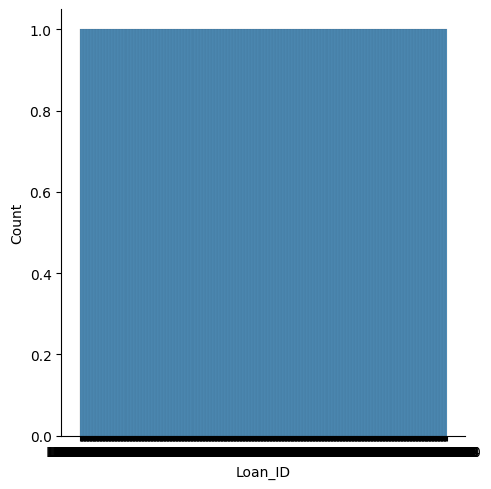

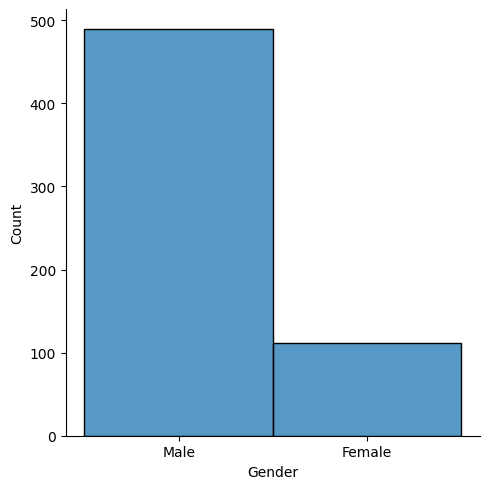

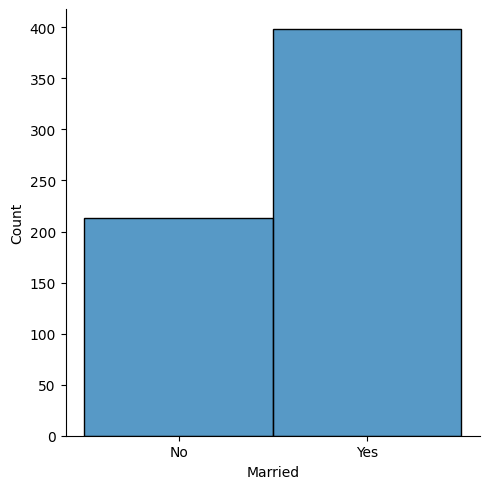

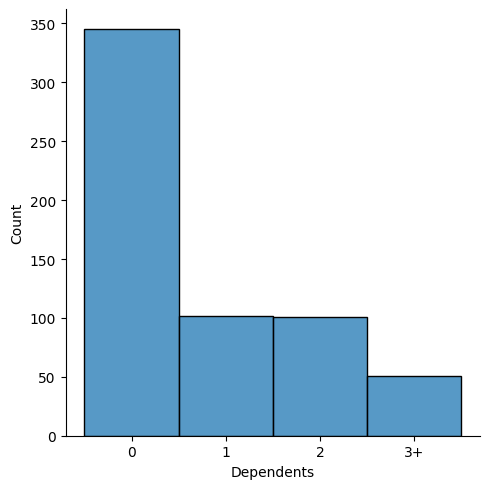

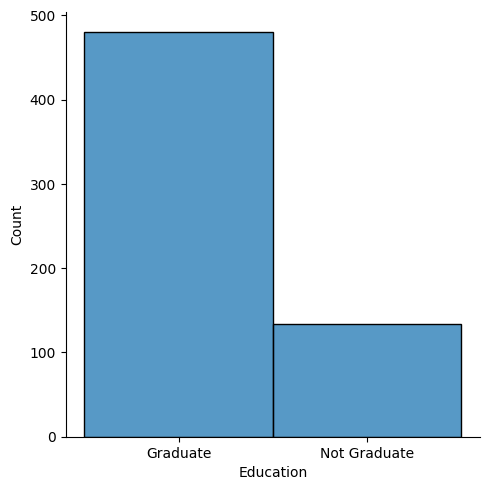

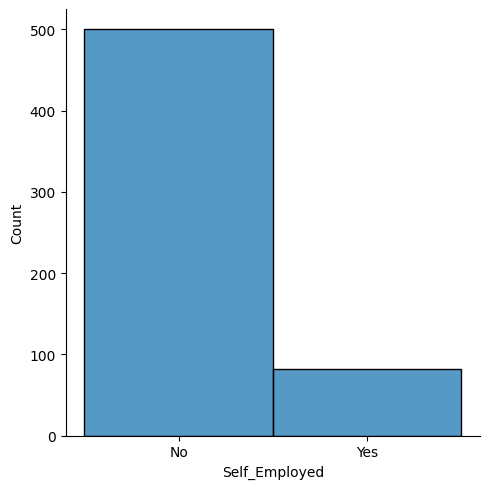

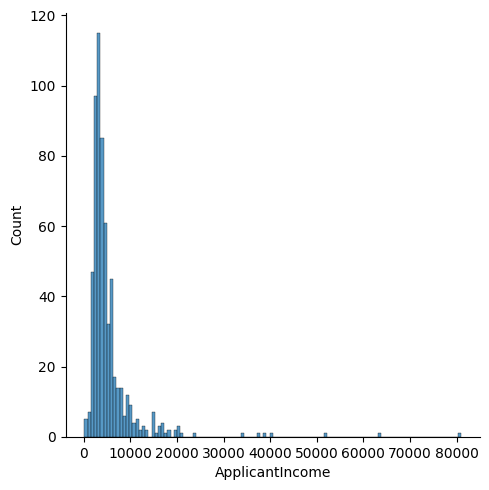

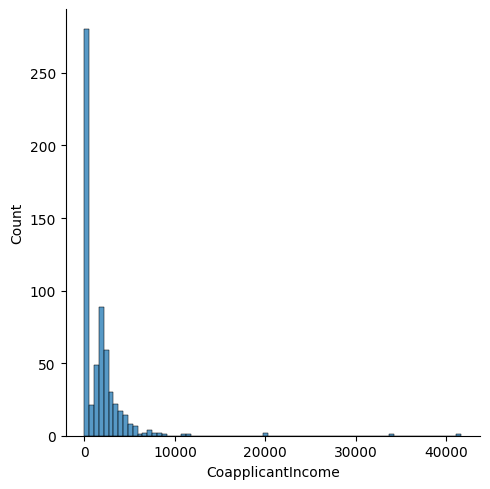

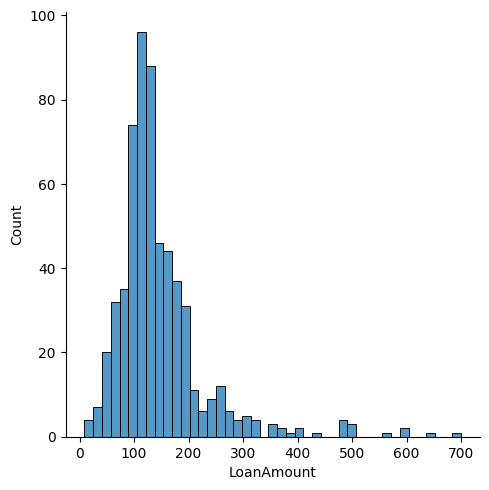

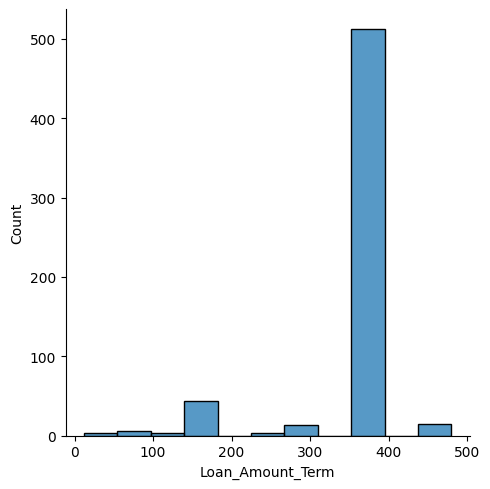

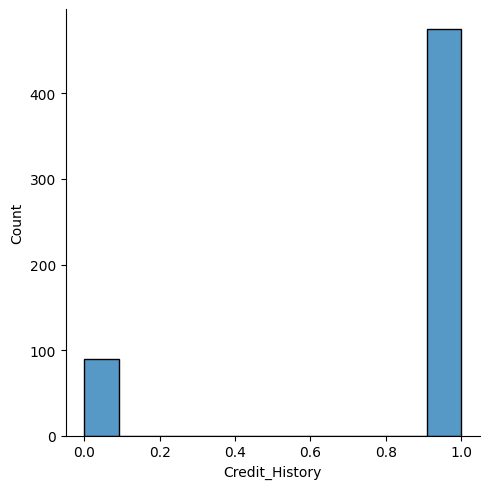

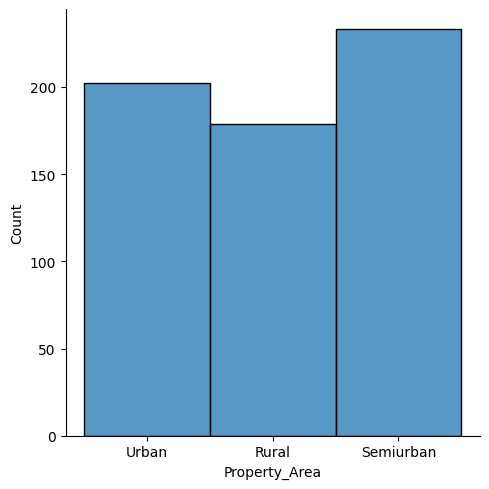

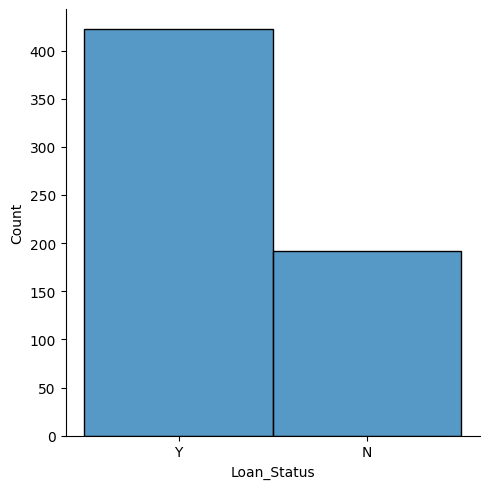

In [14]:
# creating a for loop to get the distribution plot for all columns
for column in loan_dataset:
  sns.displot(x=column, data=loan_dataset)

**Dealing with missing values**

In [15]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
# getting the missing value percentage
null_data = loan_dataset.isnull().sum()/614*100
print(null_data)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


In [17]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [18]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
loan_dataset.shape
# shows how many rows(entries) got removed


(480, 13)

In [20]:
#to compare categorial input with a categorical output example

from scipy.stats import chi2_contingency


# Create a contingency table
contingency_table = pd.crosstab(loan_dataset['Education'], loan_dataset['Loan_Status'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)


Chi-Square Statistic: 1.8942441427817767
P-value: 0.16872400009733118
Degrees of Freedom: 1
Expected Frequencies Table:
[[118.09166667 264.90833333]
 [ 29.90833333  67.09166667]]


In [21]:
# to compare numerical input with a categorical output

import statsmodels.api as sm
from statsmodels.formula.api import ols


# Perform one-way ANOVA
model = ols('LoanAmount ~ Loan_Status', data=loan_dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)



                   sum_sq     df         F    PR(>F)
Loan_Status  1.598417e+04    1.0  2.473684  0.116428
Residual     3.088685e+06  478.0       NaN       NaN


**ENCODING- Converting categorical to** **numerical**

In [22]:
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [23]:
# replacing the value of 3+ to 3
loan_dataset = loan_dataset.replace(to_replace='3+', value=3)

In [24]:
# dependent values
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
3     41
Name: Dependents, dtype: int64

In [25]:
# mapping dictionary for converting Dependents to numerical values
dependents_mapping = {
    '0': 0,
    '1': 1,
    '2': 2,
    '3+': 3  # '3+' represents '3 or more' dependents
}

# Apply the mapping to the 'Dependents' column
loan_dataset['Dependents'] = loan_dataset['Dependents'].map(dependents_mapping)


In [26]:
#label encoding of the class label
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()

labels = label_encode.fit_transform(loan_dataset['Loan_Status'])
loan_dataset['Loan_Status'] = labels


In [27]:
loan_dataset['Loan_Status'].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [28]:
#total is 480 entries

In [29]:
loan_dataset['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [30]:
loan_dataset['Gender'].value_counts()



Male      394
Female     86
Name: Gender, dtype: int64

In [31]:
loan_dataset['Married'].value_counts()

Yes    311
No     169
Name: Married, dtype: int64

In [32]:
loan_dataset['Self_Employed'].value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

In [33]:
loan_dataset['Education'].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [34]:
# List of columns to encode
columns_to_encode = ['Gender', 'Married', 'Self_Employed','Education','Property_Area']

# Create a label encoder instance
label_encoder = LabelEncoder()

# Loop through the columns and apply label encoding
for column in columns_to_encode:
    loan_dataset[column] = label_encoder.fit_transform(loan_dataset[column])


In [35]:
loan_dataset['Gender'].value_counts()

1    394
0     86
Name: Gender, dtype: int64

In [36]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2.0,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [37]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         439 non-null    float64
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 52.5+ KB


In [38]:
# all columns converted to numerical except Loan_ID

In [39]:
# drop Loan ID column
loan_dataset = loan_dataset.drop(columns=['Loan_ID'])

**Dealing with Outliers**

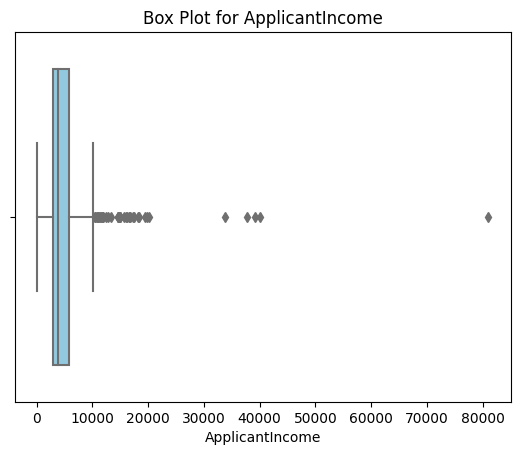

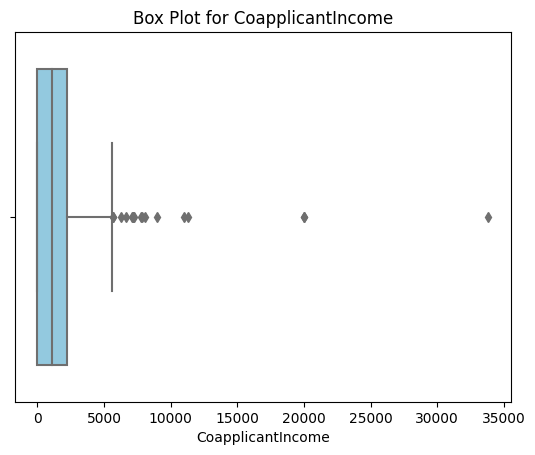

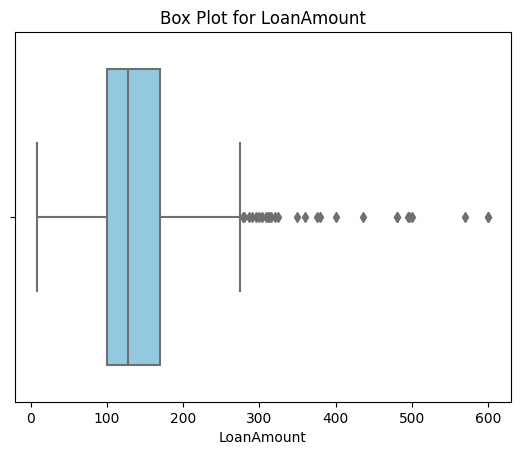

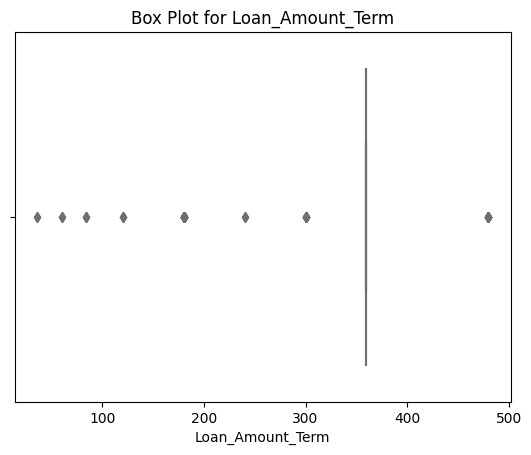

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']

# Create separate box plots for each column
for column in columns_to_plot:
    plt.figure()
    sns.boxplot(x=column, data=loan_dataset, color='skyblue')
    plt.title(f'Box Plot for {column}')
    plt.show()


**Class Imbalance**

<Axes: xlabel='Loan_Status', ylabel='count'>

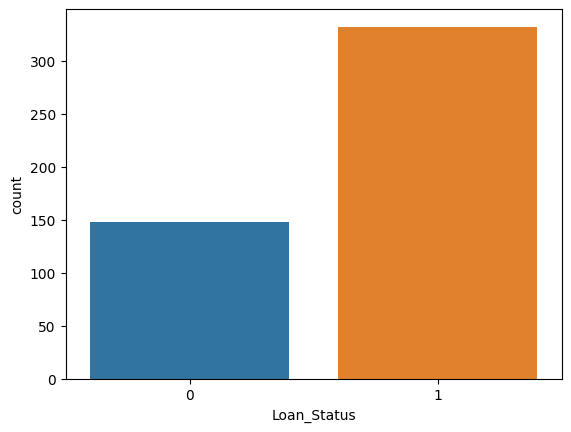

In [41]:
sns.countplot(x='Loan_Status', data=loan_dataset)
#class is imbalanced (can considee using SMOTE)

In [42]:
# grouping based on the class label 'loan_status' to compare means of the two class variables
loan_dataset.groupby('Loan_Status').mean()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,
0,0.783784,0.567568,0.503704,0.243243,0.155405,5730.189189,1773.081081,153.378378,342.810811,0.574324,0.986486
1,0.837349,0.683735,0.598684,0.183735,0.129518,5201.093373,1495.508795,140.882530,341.710843,0.978916,1.039157


**Corrleration Matrix**

In [43]:
correlation_matrix = loan_dataset.corr()

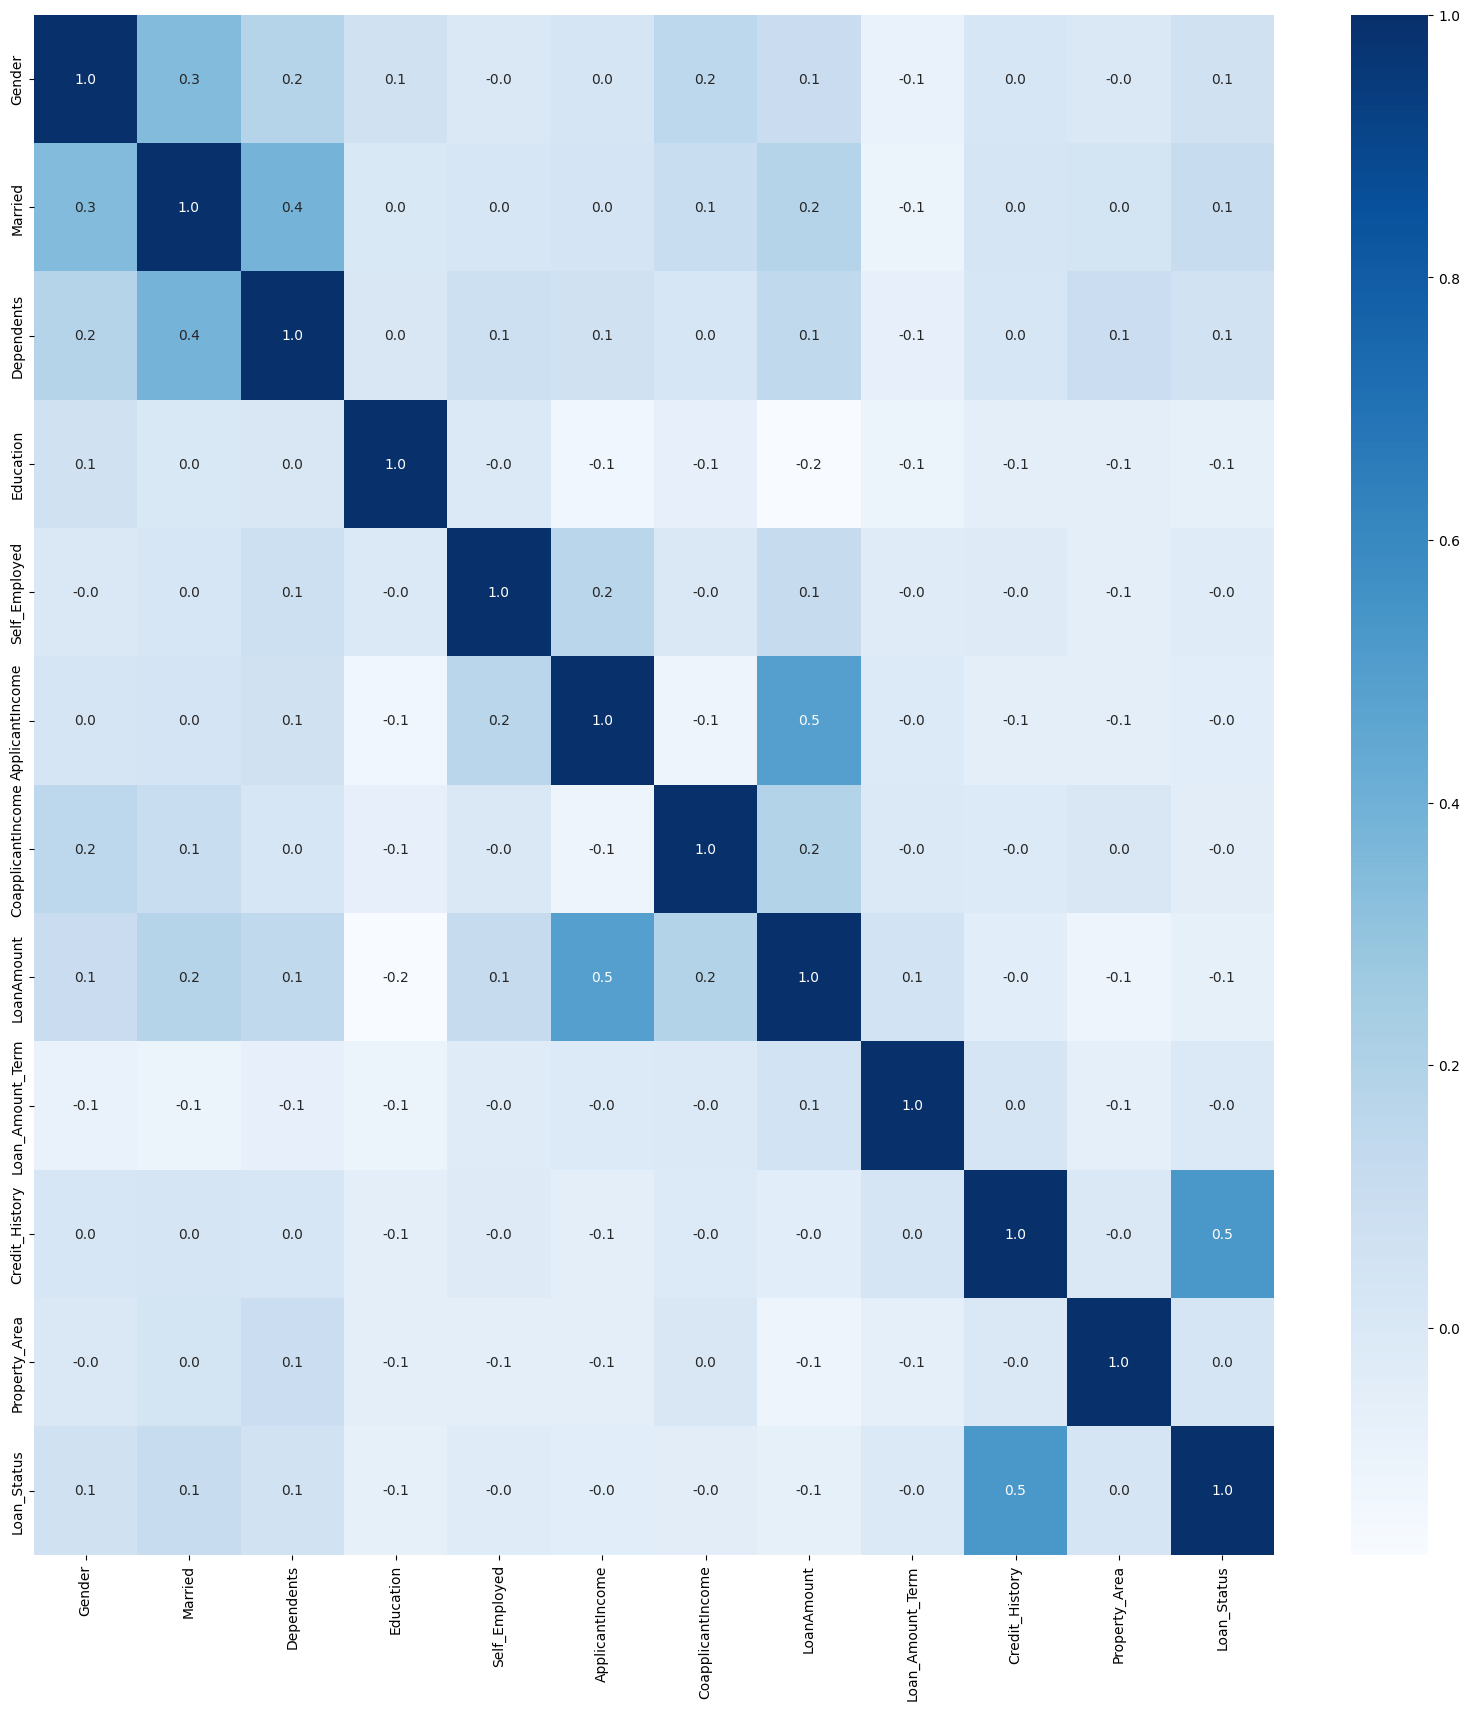

In [44]:
# constructing a heat map to visualize the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')
plt.savefig('Correlation Heat map')